<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/mobile-net/Algorithums/pretrained/MobileNetV3/MobileNetV3_ROOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet v3

In [1]:
!pip install firebase-admin

## Imports

### Collab Imports

In [2]:
from google.colab import drive

In [14]:
firebase_count=1

### Default Nessary Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date,datetime
import json
import csv

### Tensorflow Imports

In [46]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D,Dropout
import firebase_admin
from firebase_admin import credentials,storage
from firebase_admin import firestore

## Variables

### Path variables

In [5]:
dataset_dir='/content/drive/MyDrive/AYUSHVISION/working' #datasetbase dirctory

In [79]:
epochs=100

In [80]:
document_id=f'{datetime.now().strftime("%Y_%m_%d_%H")}_{epochs}'
storageLocation=f'training/mobile_net/root/'

In [81]:
working_dir=f'/content/drive/MyDrive/AYUSHVISION/ready/{document_id}'

In [82]:
dataset_train_dir=os.path.join(dataset_dir,'train')
dataset_test_dir=os.path.join(dataset_dir,'val')
dataset_val_dir=os.path.join(dataset_dir,'val')

### Genrator Variable

In [10]:
rescale=1/255

### Configration Variables

In [11]:
target_size=(224,224)
class_mode='categorical'
input_shape=(224,224,3)

### Model Variables

#### Number If Classes

In [83]:
no_of_classes=1

## Envirumentatl Setup

### Collab

In [84]:
drive.mount('/content/drive') # drive activate for Use

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Firebase

In [85]:

if firebase_count==1:
  cred = credentials.Certificate("/content/drive/MyDrive/AYUSHVISION/ServiceKey.json")
  firebase_admin.initialize_app(cred,{
    'storageBucket': 'ayush-vision-asw4gh.appspot.com'
})
firebase_count=firebase_count+1

In [86]:
db = firestore.client()

In [87]:
bucket = storage.bucket()

In [88]:
dcnn_ref = db.collection("training1").document('mobile-net')
doc = dcnn_ref.get()

In [89]:
if not doc.exists:
  doc_ref= db.collection("training1").document('mobile-net')
  doc_ref.set({'algorithum':'mobile-net','version':'1','mode':'classification','url':'mobile-net'})
else:
  doc_ref= dcnn_ref

## Validations

In [90]:
f'{dataset_train_dir} is Correct' if os.path.exists(dataset_train_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_train_dir} is incorrect'


'/content/drive/MyDrive/AYUSHVISION/working/train is Correct'

In [91]:
f'{dataset_test_dir} is Correct' if os.path.exists(dataset_test_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_test_dir} is incorrect'


'/content/drive/MyDrive/AYUSHVISION/working/val is Correct'

In [92]:
f'{dataset_val_dir} is Correct' if os.path.exists(dataset_val_dir) and os.path.isdir(dataset_val_dir) else f' {dataset_val_dir} is incorrect'

'/content/drive/MyDrive/AYUSHVISION/working/val is Correct'

In [93]:
if not os.path.exists(working_dir):
  os.makedirs(working_dir)

## DataSet

### Image Genarator

In [24]:
train_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [25]:
test_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [26]:
val_data_genrator=image.ImageDataGenerator(rescale=rescale)

### Prepared Dataset

In [27]:
train_ds_gen=train_data_genrator.flow_from_directory(
    dataset_train_dir,
    target_size=target_size,
    class_mode=class_mode
)
val_ds_gen=val_data_genrator.flow_from_directory(
    dataset_val_dir,
    target_size=target_size,
    class_mode=class_mode
)

test_ds_gen=test_data_genrator.flow_from_directory(
    dataset_test_dir,
    target_size=target_size,
    class_mode=class_mode
)

Found 140 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


## Model


In [94]:
basicdata={'account':'thanumahee440@gmail.com','user':"Thanush"}

In [95]:
basicdata['imageSize']=[224,224]
basicdata['project']=working_dir
basicdata['name']=document_id
basicdata['training_date']=datetime.now().strftime("%Y/%m/%d %H:%M:%S")
basicdata['filename']='MobileNet_Root'


In [96]:
basicdata['names']=os.listdir(os.path.join(dataset_dir,'train'))

In [97]:
today_ref=doc_ref.collection("Root").document(document_id)

In [98]:
today_ref.set(basicdata)

update_time {
  seconds: 1725861078
  nanos: 236824000
}

### Base Model MobileNetV3

In [100]:
ayush_mobilenetV3_base=MobileNetV3Large(input_shape=input_shape,  # We don't want the dense layers on top
                       input_tensor=None,
                        include_top=False,
                        weights='imagenet')

### Layers setup for Base Model

In [101]:
ayush_mobilenetV3_base.trainable=True

### Final Model

In [102]:
ayushVision_MobileNetV3_Model=Sequential()


In [103]:
ayushVision_MobileNetV3_Model.add(ayush_mobilenetV3_base)

#### Middle Layers

In [104]:
ayushVision_MobileNetV3_Model.add(GlobalAveragePooling2D())

In [105]:
ayushVision_MobileNetV3_Model.add(Dense(320, activation='relu'))

In [106]:
ayushVision_MobileNetV3_Model.add(Dropout(0.2))

In [107]:
ayushVision_MobileNetV3_Model.add(Dense(320, activation='relu'))

#### Last Layer

In [108]:
ayushVision_MobileNetV3_Model.add(Dense(no_of_classes, activation='softmax'))

In [56]:
ayushVision_MobileNetV3_Model.summary()

ValueError: Undefined shapes are not supported.

In [109]:
today_training_colref=today_ref.collection('Train')

## Model Compile

#### Optimizer

In [110]:
optimizer = Adam(learning_rate=0.001)

#### Compile

##### Variables

In [111]:
metrics=["accuracy"]
lossfn='categorical_crossentropy'

In [112]:
ayushVision_MobileNetV3_Model.compile(
    optimizer=optimizer,
    loss=lossfn,
    metrics=metrics)

In [113]:
todat_fit_train_ref=today_training_colref.document('fit')

In [114]:
todat_fit_train_ref.set({
    'epochs':epochs,
    'loss':lossfn,
    'optimizer':optimizer.get_config()

})

update_time {
  seconds: 1725861124
  nanos: 501336000
}

### Trainning

In [115]:
model_history=ayushVision_MobileNetV3_Model.fit(
    train_ds_gen,
    epochs=epochs,
    validation_data=val_ds_gen)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 79s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 1.0000 

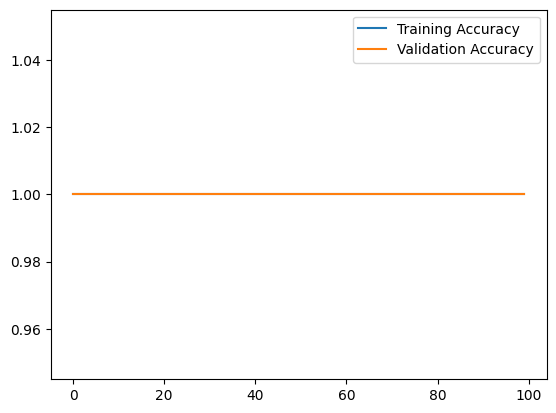

In [116]:
# Plot training history
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f"{working_dir}/mobile_net{epochs}_model_accuracy.jpg")
plt.show()

In [117]:
blob = bucket.blob(f"{storageLocation+document_id}/val/training_plot{document_id}.jpg")
blob.upload_from_filename(f'{working_dir}/mobile_net{epochs}_model_accuracy.jpg')
blob.make_public()

In [118]:
validationref=today_ref.collection('Val')

In [119]:
valhistory_ref=validationref.document('history')
valaccuracy_ref=validationref.document('accuracy_plot')

In [120]:
valhistory_ref.set(
    model_history.history
)

update_time {
  seconds: 1725861334
  nanos: 999210000
}

In [121]:
valaccuracy_ref.set({
    'url':blob.public_url
})

update_time {
  seconds: 1725861335
  nanos: 289769000
}

### Evaluation

In [122]:
test_loss, test_accuracy = ayushVision_MobileNetV3_Model.evaluate(test_ds_gen)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


In [123]:
testref=today_ref.collection('Test')

In [124]:
test_accuracy_loss=testref.document('test_accuracy_lost')
test_accuracy_loss.set({
    'accuracy':test_accuracy,
    'loss':test_loss
})

update_time {
  seconds: 1725861335
  nanos: 910334000
}

In [125]:
modelref=today_ref.collection('Model')

In [126]:
ayushVision_MobileNetV3_Model.save(f'{working_dir}/mobile_net_root_{epochs}.h5',)

In [127]:
savemodel=modelref.document('model')

In [128]:
blob = bucket.blob(f"{storageLocation+document_id}/model/mobile_net_root_{epochs}.h5")
blob.upload_from_filename(f'{working_dir}/mobile_net_root_{epochs}.h5')
blob.make_public()
h5model=blob.public_url

In [129]:
savemodel.set({'model':h5model})

update_time {
  seconds: 1725861346
  nanos: 294620000
}

In [ ]:
directory_path = 'sample/predict'
files = os.listdir(directory_path)

for file in files:
    image_path = os.path.join(directory_path, file)

    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)


        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')
